# IBM Developer Skills Network

# Histogram and Intensity Transformation

In [1]:
# Image link - old file is in the previous notebook
# 'https://github.com/sonpn82/Introduction-to-computer-vision-and-image-processing/blob/master/cameraman.jpeg?raw=true'
# 'https://github.com/sonpn82/Introduction-to-computer-vision-and-image-processing/blob/master/goldhill.bmp?raw=true'
# 'https://github.com/sonpn82/Introduction-to-computer-vision-and-image-processing/blob/master/mammogram.png?raw=true'
# 'https://github.com/sonpn82/Introduction-to-computer-vision-and-image-processing/blob/master/zelda.png?raw=true'

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
# Define a helper function to plot 2 images side by side
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [4]:
# Function to plot 2 histogram side by side
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

# Histogram

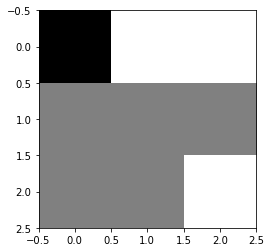

toy_image [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [5]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap='gray')
plt.show()
print('toy_image', toy_image)

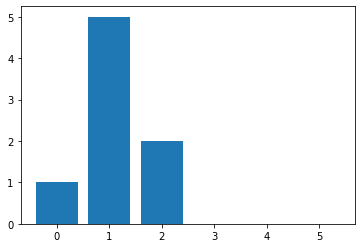

In [6]:
# Manually draw a sample histogram
plt.bar([x for x in range(6)], [1,5,2,0,0,0])
plt.show()

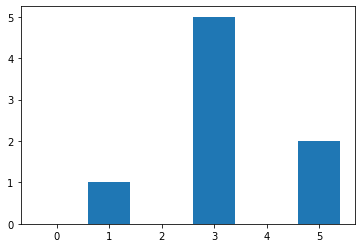

In [7]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

# Gray Scale Histogram

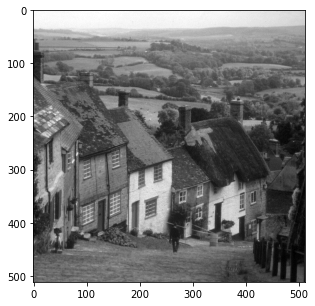

In [8]:
goldhill = cv2.imread('goldhill.bmp', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5, 5))
plt.imshow(goldhill, cmap='gray')
plt.show()

In [11]:
# Calculate the histogram
hist = cv2.calcHist([goldhill],[0], None, [256], [0, 256])
hist.shape

(256, 1)

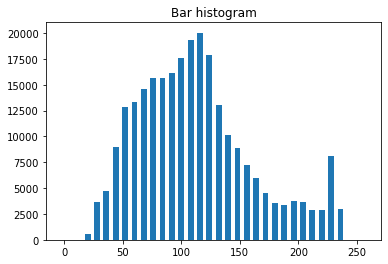

In [10]:
# Plot the histogram
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title('Bar histogram')
plt.show()

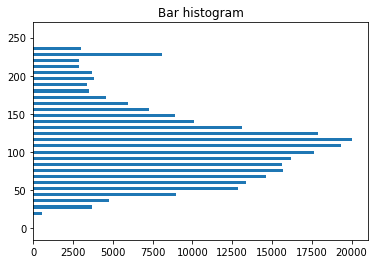

In [22]:
# Plot it as bar h graph
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.barh(intensity_values,hist[:,0], height=4)
plt.title('Bar histogram')
plt.show()

In [23]:
# Convert to probality mass function by normalizing it by the number of pixels
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

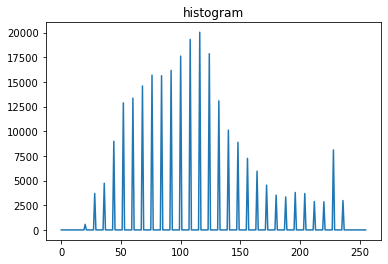

In [24]:
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

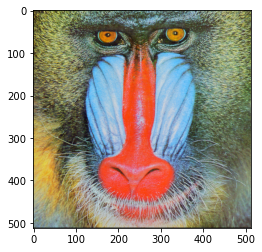

In [26]:
# Apply a histogram to each image color channel
baboon = cv2.imread('baboon.png')
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

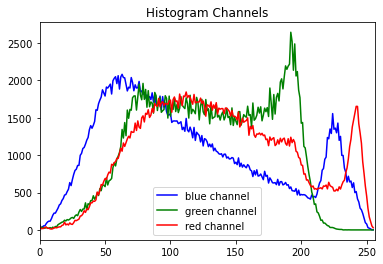

In [27]:
color = ('blue', 'green', 'red')
for i,col in enumerate(color):
    histr = cv2.calcHist([baboon], [i], None, [256], [0, 256])
    plt.plot(intensity_values, histr, color=col, label=col + ' channel')
    plt.xlim([0, 256])

plt.legend()
plt.title("Histogram Channels")
plt.show()

# Intensity Transformation

In [29]:
# Tranform each pixel intensity by a function
# g(x,y) = T(f(x,y)) with x, y is row & col of image
# a simple tranformation is like: g(x,y) = 2*f(x,y)+1

## Image Negatives

In [30]:
# g(x,y) = L-1-f(x,y)
# L is max range of intensity (ex L=256)

neg_toy_image = -1 * toy_image + 255
print("toy image\n", neg_toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


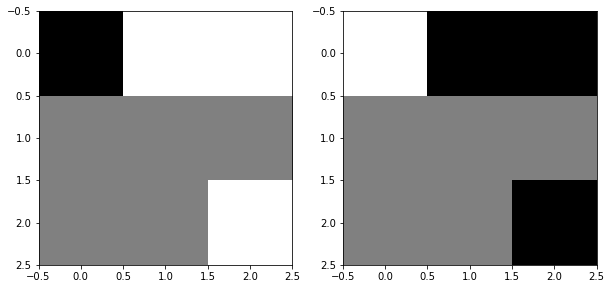

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [31]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:",toy_image)

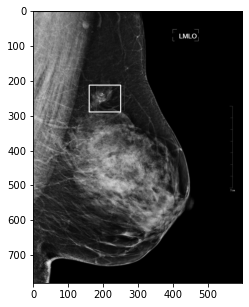

In [32]:
image = cv2.imread('mammogram.png', cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color=(255), thickness=2)

plt.figure(figsize = (5,5))
plt.imshow(image, cmap="gray")
plt.show()

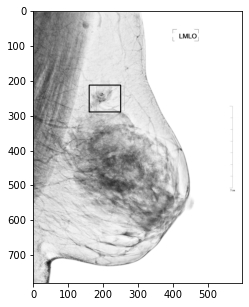

In [33]:
# Apply intensity transformation
img_neg = -1 * image + 255

plt.figure(figsize=(5, 5))
plt.imshow(img_neg, cmap = "gray")
plt.show()

## Brightness and Contrast adjustment

In [34]:
# 𝑔(𝑥,𝑦)=𝛼𝑓(𝑥,𝑦)+𝛽
# 𝛼 for contrast control
# 𝛽 to improve brightness control

alpha = 1
beta = 100
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

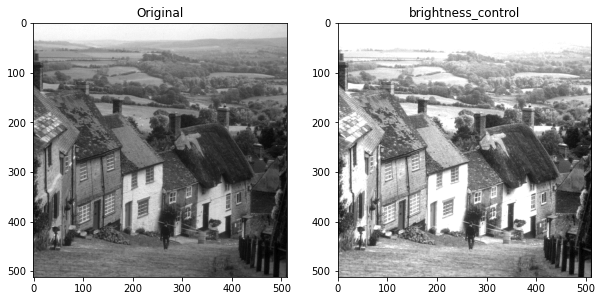

In [35]:
plot_image(goldhill, new_image, title_1='Original', title_2='brightness_control')

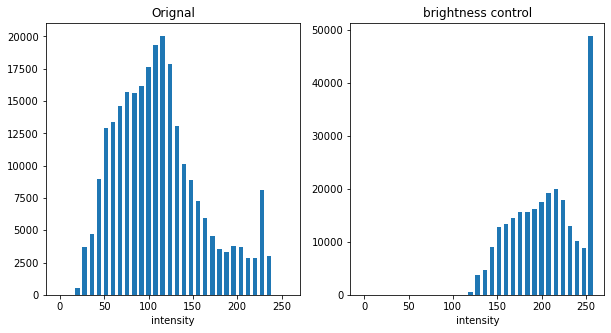

In [36]:
# histogram is shifted to the right (high intesity value)
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

In [37]:
# Increase contrast
plt.figure(figsize=(10, 5))
alpha = 2
beta = 0
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

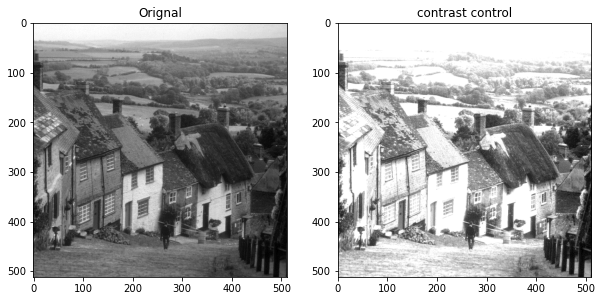

In [38]:
plot_image(goldhill,new_image,"Orignal","contrast control")

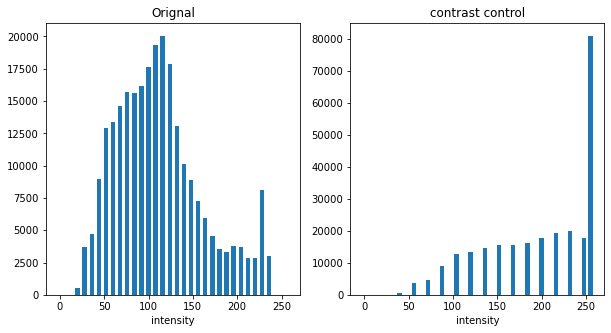

In [39]:
# Histogram
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image,"Orignal","contrast control")

In [40]:
# Increase contrast and also make image darker
plt.figure(figsize=(10, 5))
alpha = 3
beta = -200
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

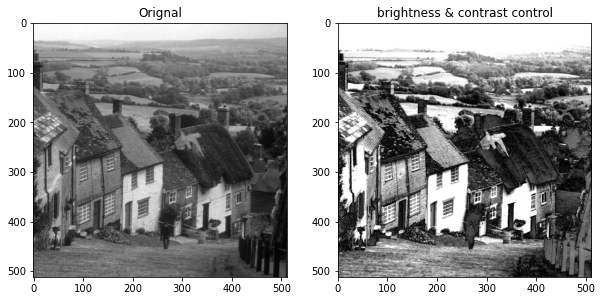

In [41]:
plot_image(goldhill, new_image, "Orignal", "brightness & contrast control")

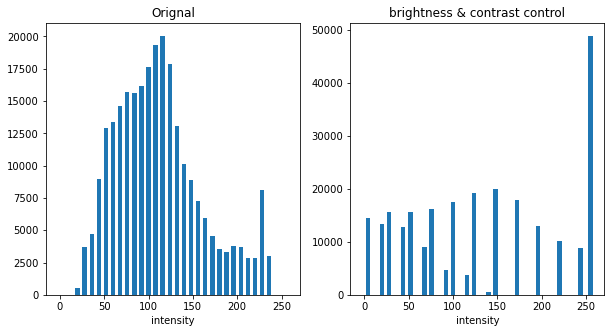

In [42]:
# Columns appear to be far from each other ==> higher contrast
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness & contrast control")

## Histogram Equalization

In [44]:
# Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels; It does this by flatting the histogram
zelda = cv2.imread('zelda.png', cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)

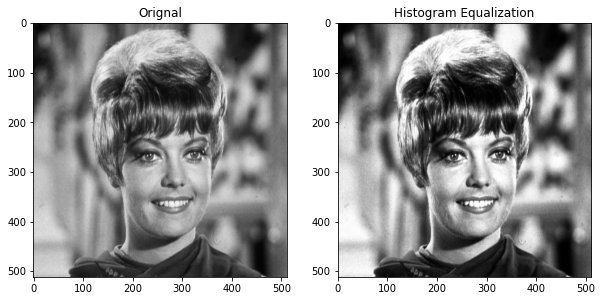

In [45]:
plot_image(zelda,new_image,"Orignal","Histogram Equalization")

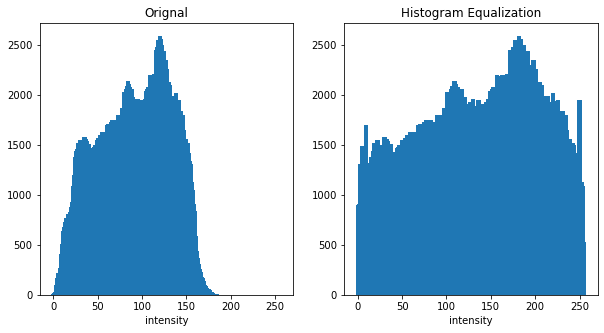

In [46]:
# The histogram is stretched out
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image,"Orignal","Histogram Equalization")

## Thresholding and Simple Segmentation

In [48]:
#  If a particular pixel (i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, 
#  otherwise, it will set it to another value, usually zero

def thresholding(input_img, threshold, max_value=255, min_value=0):
    N, M = input_img.shape
    image_out = np.zeros((N, M), dtype = np.uint8)

    for i in range(N):
        for j in range(M):
            if input_img[i, j] > threshold:
                image_out[i, j] = max_value
            else:
                image_out[i, j] = min_value
        
    return image_out

In [49]:
# sample toy image
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

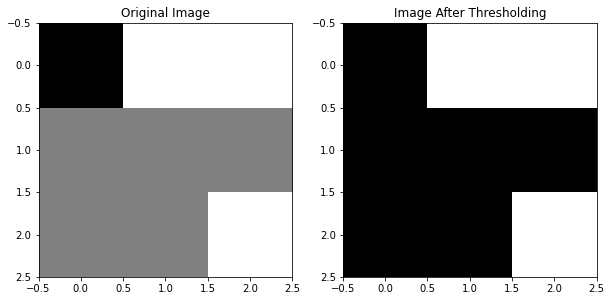

In [50]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

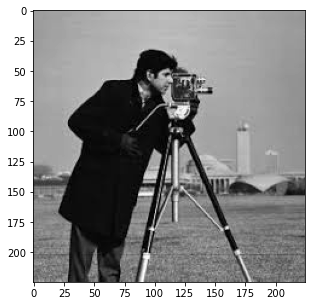

In [51]:
# cameraman image
image = cv2.imread('cameraman.jpeg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap = 'gray')
plt.show()

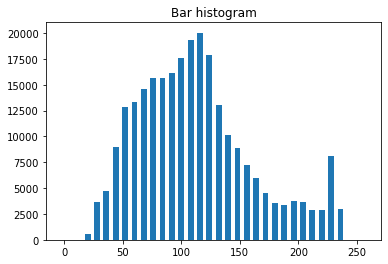

In [52]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [53]:
# Manually set threshold at 87
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

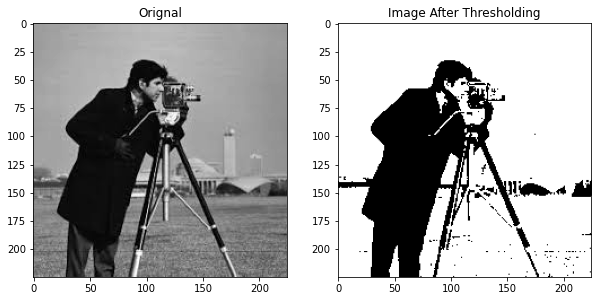

In [54]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

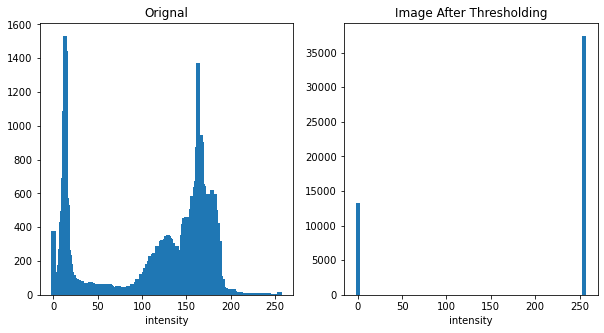

In [55]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

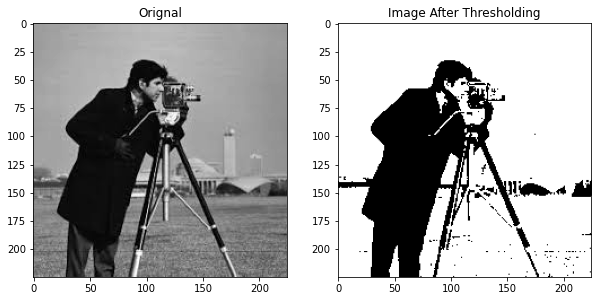

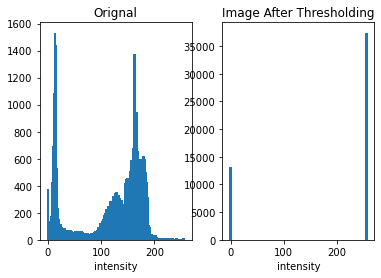

In [57]:
# Use cv2 THRESH_BINARY to set pixel to 0 or 255 depends on threshold value
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

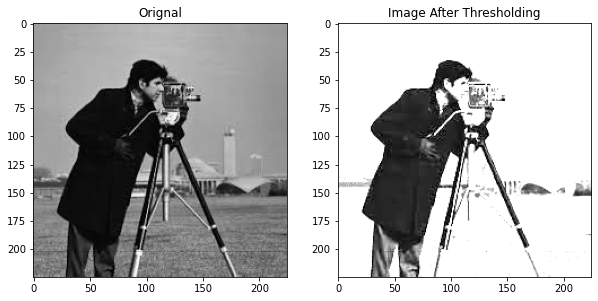

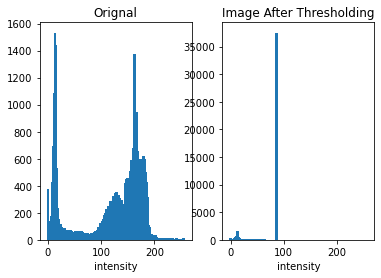

In [58]:
# THRESH_TRUNC will not change pixel value if it is less than the threshold value
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

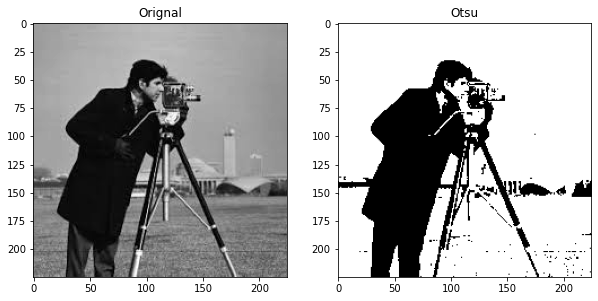

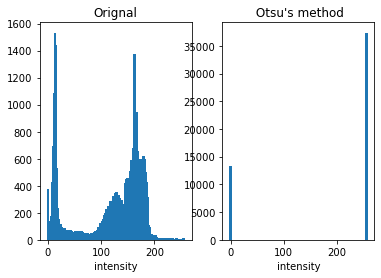

In [59]:
# Auto set threshold value with THRESH_OTSU
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")